## Simulating from the null Hypothesis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200)

`1.` If you were interested in studying whether the average height for coffee drinkers is the same as for non-coffee drinkers, what would the null and alternative hypotheses be?  Write them in the cell below, and use your answer to answer the first quiz question below.

In [ ]:
# sample1: coffee_drinker 
# sample2 non-coffee_drinker 
## avg height of two roup are same??

# h0: mean_sample1 = mean_sample2 
# h1: mean_sample1 != mean_sample2


`2.` If you were interested in studying whether the average height for coffee drinkers is less than non-coffee drinkers, what would the null and alternative hypotheses be?  Write them in the cell below, and use your answer to answer the second quiz question below.

In [3]:
# avg height of sample1 < meanof sample2 ?

# h0 mean_sample1 >= mean_sample2
# h1 mean_sample1 < mean_sample2

`3.` For 10,000 iterations: bootstrap the sample data, calculate the mean height for coffee drinkers and non-coffee drinkers, and calculate the difference in means for each sample.  You will want to have three arrays at the end of the iterations - one for each mean and one for the difference in means.  Use the results of your sampling distribution, to answer the third quiz question below.

In [5]:
sample

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
2467,4929,>=21,True,70.146354
1868,5837,>=21,True,71.655969
2396,5117,>=21,True,67.955091
1743,7575,>=21,True,69.796646
...,...,...,...,...
1370,3295,>=21,True,68.308250
144,7327,<21,False,64.851825
1195,6397,<21,False,64.555794
1662,4602,<21,False,72.223726


In [7]:
bootsamp_200_diff_list = []
bootsamp_200_y_list =[]
bootsamp_200_n_list = []
for _ in range(10000):
    sample = sample_data.sample(200,replace=True)
    
    mean_y = sample[sample['drinks_coffee']==True]['height'].mean()
    bootsamp_200_y_list.append(mean_y)
    
    mean_n = sample[sample['drinks_coffee']==False]['height'].mean()
    bootsamp_200_n_list.append(mean_n)
    
    
    mean_diff = (mean_y - mean_n)
    bootsamp_200_diff_list.append(mean_diff)
    

In [8]:
# std of sampling distribution for mean , no drink 
np.std(bootsamp_200_n_list)

0.4042437432365953

In [9]:
# std of sampling distribution for mean, y drink 
np.std(bootsamp_200_y_list)

0.24769715310344376

In [10]:
# std of sampling distribution for diff mean, 
np.std(bootsamp_200_diff_list)

0.4707176631965618

(array([9.000e+00, 7.600e+01, 5.530e+02, 2.000e+03, 3.477e+03, 2.808e+03,
        9.240e+02, 1.470e+02, 5.000e+00, 1.000e+00]),
 array([67.05907261, 67.28594335, 67.51281409, 67.73968483, 67.96655556,
        68.1934263 , 68.42029704, 68.64716777, 68.87403851, 69.10090925,
        69.32777998]),
 <BarContainer object of 10 artists>)

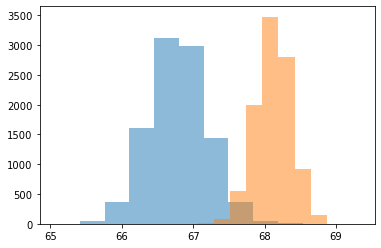

In [15]:
plt.hist(bootsamp_200_n_list, alpha=0.5)
plt.hist(bootsamp_200_y_list, alpha=0.5)


(array([  15.,  120.,  728., 1989., 3206., 2657., 1057.,  204.,   18.,
           6.]),
 array([-0.50440337, -0.11119464,  0.28201409,  0.67522282,  1.06843155,
         1.46164028,  1.854849  ,  2.24805773,  2.64126646,  3.03447519,
         3.42768392]),
 <BarContainer object of 10 artists>)

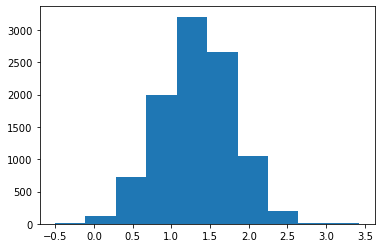

In [12]:
plt.hist(bootsamp_200_diff_list)

In [13]:
np.percentile(bootsamp_200_diff_list,2.5)

0.40425559726656457

In [19]:
np.mean(bootsamp_200_diff_list)

1.3311768319020838

`4.` Now, use your observed sampling distribution for the difference in means and [the docs](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html) to simulate what you would expect the sampling distribution to be if the null hypothesis is true. You can do this be recentering your distribution at zero. Also, calculate the observed sample mean difference in `sample_data`. Use your solutions to answer the last questions in the quiz below.

In [16]:
null_vals = np.random.normal(0, np.std(bootsamp_200_diff_list), 10000)

(array([3.800e+01, 2.450e+02, 1.073e+03, 2.497e+03, 3.050e+03, 2.152e+03,
        7.840e+02, 1.430e+02, 1.700e+01, 1.000e+00]),
 array([-1.65268971, -1.27391732, -0.89514493, -0.51637255, -0.13760016,
         0.24117222,  0.61994461,  0.998717  ,  1.37748938,  1.75626177,
         2.13503415]),
 <BarContainer object of 10 artists>)

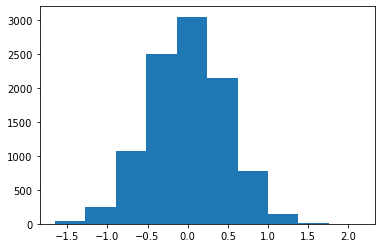

In [17]:
plt.hist(null_vals)